In [1]:
import sys 
sys.path.append('..')

from targets import Target
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from models import SoftmaxWeight, LocationScaleFlow
from models import DIFDensityEstimator
from models_em import EMDensityEstimator
%load_ext autoreload
%autoreload 2

tensor([[0.0000, 0.0000, 0.3125,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.6250, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 0.5625, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0625,  ..., 0.3750, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.1250,  ..., 0.7500, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6250,  ..., 0.7500, 0.0625, 0.0000]])
number of training samples 1797


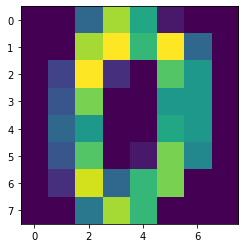

In [2]:
###DIGITS###

from sklearn.datasets import load_digits
digits = load_digits()
extracted = digits.data
plt.imshow(digits.images[0])
target_samples = torch.tensor(extracted).float()
target_samples = (target_samples)/16
print(target_samples)
p = target_samples.shape[1]
num_samples = target_samples.shape[0]

print("number of training samples "  +str(num_samples))

In [ ]:
K = 20
weight = SoftmaxWeight(K, p, [10,10,10])
dif = DIFDensityEstimator(target_samples, K)
dif.w = weight
loss_values = dif.train(1000)

 35%|████████████████████████████████████████████                                                                                   | 347/1000 [01:34<04:06,  2.65it/s, loss = -13.021151]

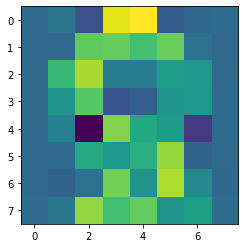

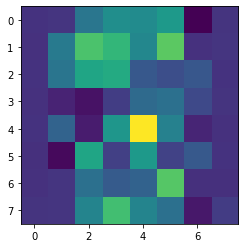

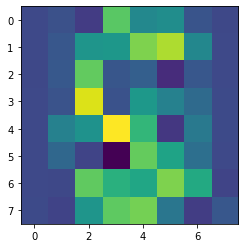

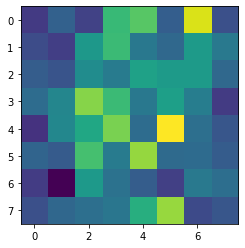

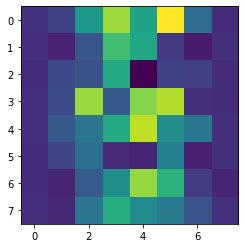

In [24]:
for _ in range(5):
    plt.figure()
    plt.imshow(dif.sample_model(1).cpu().detach().reshape(8,8))